<a href="https://colab.research.google.com/github/santiagoahl/ml_/blob/main/Solucion_entrega_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Santiago Ahumada Lozano

ID: 1000151171

In [ ]:
from math import ceil, pow, log, sqrt, exp

# **Exercise 2.2**



## **(a)** 
Verify the bound of Theorem 2.4 in three cases of Example 2.2:


### **(i) Positive rays:**

 $\mathcal{H}$ consis of all hypotheses in one dimension of the form $h(x) = sign(x-a)$

**Solution**

As we found in Example 2.2, $m_H(N) = N+1$. Con lo cual,

\begin{align}
      m_H(N) &= N+1 \\
             &=\binom{N}{1}+\binom{N}{0} \\
             &\leq \sum_{i=0}^{k-1}\binom{N}{i}
\end{align}

### **(ii) Positive intervals**

$\mathcal{H}$ consis of all hypotheses in one dimension that are positive within some interval and negative elsewhere.


**Solution**

Analogously, we know $m_H(N)=\binom{N+1}{2}$. But

$$ \binom{N+1}{2} = \binom{N}{2}+\binom{N}{1}$$

Hence,

\begin{align}
      m_H(N) &= \binom{N}{2}+\binom{N}{1} \\
             &\leq \sum_{i=0}^{k-1}\binom{N}{i}
\end{align}

### **(iii) Convex sets**

$\mathcal{H}$ consis of all hypotheses in two dimensions that are positive inside some convex set and negative elsewhere.
 

**Solution**

Notice that $m_H(N) = 2^N$ Hence $m_H(N)<2^{N+1}$. We need to show that  $m_{H}(N)\leq \sum_{i=0}^{N}\binom{N}{i}$. In this case we get the equality.
$$ 2^N = \sum_{i=0}^{N}\binom{N}{i} $$
 In fact $2^N$ can be seen as the number of subsets of a set with size $N$ and $\binom{N}{i}$ as the number of subsets with cardinality $i$ where $i=0,..,N$. We add up the totallity of the cases over all $i$ such that $0\leq i\leq N$. Both LHS and RHS depicts the same.



## **(b)**

Does there exist a hypothesis set for which $m_\mathcal{H}(N) = N + 2^{\lfloor N/2\rfloor}$?


**Solution**

By **Theorem 2.4** we know that every growth function $m_\mathcal{H}{(N)}$ (which describes how much dichotomies can by generated by the hypotesis set on $N$ points) Is bounded by a polynomial function always we catch a break point $k\lneq N$. For instance, 

$$ \mathbf{3} + 2^{\lfloor \mathbf{3}/2\rfloor}  = 5 < 2^{3}$$

In other words, $k=3$ is a break point. We got the contradiction that the exponential-order function given $m_\mathcal{H}(N) = N + 2^{\lfloor N/2\rfloor}$ is bounded by a polynomial of degree $2$. 

We conclude that there's no such hypothesis set.



# **Exercise 2.5**

Suppose we have a simple learning model whose growth function is $m_\mathcal{H
}(N)=N+1$, hence $d_{VC} = 1$. Use the *VC bound* to estimate the probability that $E_{out}$ will be within $0.1$ of $E_{in}$ given $100$ training examples 

## Solution

Consider the $VC$ bound

$$ E_{out}\leq E_{in}+ \sqrt{\frac{8}{N}ln(\frac{4m_H(2N)}{\delta})} $$

Since we want that $ E_{out}\leq E_{in} + 0.1$ given $N=100$. We just need to find $1+\delta$ after solving for $\delta$ the equation

$$0.1 = \sqrt{\frac{8}{N}ln(\frac{4m_H(2N)}{\delta})} $$

In general we may replace $0.1$ by a fixed value $\alpha$, it is too easy to show thath

$$\delta = 4m_H(2N)e^{-N\alpha^2/8}$$

Since $m_H(2N) = 2N + 1$, we obtain

$$\delta = 4(2N+1)e^{-N\alpha^2/8}$$

And the probability of this event is at least 

$$ p = 1-\delta $$

In [ ]:
def delta(alpha, N):
  a = float(N*pow(alpha,2))/8.0
  d = float((8*N)+4)*exp(-a)
  return d

alpha = 0.1
N = 10000
delta = delta(alpha, N)
prob = 1 - delta
print('The probability of E_out(g) ≤ E_in(g) + ' + str(alpha) + ' given ' + str(N) + ' training examples is at least: ' + str(prob))

if prob <= 0:
  print('This event is almost imposible')





The probability of E_out(g) ≤ E_in(g) + 0.1 given 10000 training examples is at least: 0.7018528396210186


We obtain decents probabilities for a number of training examples greater that $10,000$

# **Exercise 2.6**

A data set has $600$ examples. To properly test the performace of the final hypothesis, you set aside a randomly selected subset of $200$ examples which are never used in the training phase; these form a test set. You use a learning model with $1000$ hypotheses and select the final hypothesis $g$ based on the $400$ training examples. We wish to estimate $E_{out}(g)$. We have access to two estimates: $E_{in}(g)$, the in sample error of $400$ training examples; and, $E_{test}(g)$, the test error on the $200$ test examples that were set aside.


## **(a)**

Using a $5$% error tolerance ($\delta = 0.05$), which estimate has the higher 'error bar'?

**Solution**

We put $M = 1$ in the Hoeffding's generalization bound in order to calculate $E_{test}$, namely,

$$ E_{out}(g) - E_{test}(g) \leq \sqrt{\frac{1}{2N}ln(\frac{2}{\delta})}$$

Then if we assing $e_{test}$ to be the 'error bar' of $E_{test}$. We claim that,

$$ e_{test} = \sqrt{\frac{1}{2N}ln(\frac{2}{\delta})} $$

By a similar way,

$$ e_{in} = \sqrt{\frac{1}{2N}ln(\frac{2M}{\delta})} $$

From the monotonicity of both $\sqrt{\cdot}$ and $ln(\cdot)$. It becomes clear that the $E_{in}(g)$ estimate has the higher 'error bar'.


In [ ]:
def error_bar(M, delta, N):
  y = sqrt(float((1)/2*N)*log(float((2*M)/delta)))
  return y

delta = 0.05
N_test = 200
N_train = 400
Num_hyp_test = 1
Num_hyp_in = 1000

e_test = error_bar(Num_hyp_test, delta, N_test)
e_in = error_bar(Num_hyp_in, delta, N_train)

print('Error bar in testing sample: ', e_test)
print('Error bar in training sample: ', e_in)

if e_test < e_in:
  print('E_in has the higher error bar')
else:
  print('E_test has the higher error bar')



Error bar in testing sample:  19.206455826398415
Error bar in training sample:  46.036148260027296
E_in has the higher error bar


## **(b)**

Is there any reason why you shouldn't reserve even more examples for testing?

**Solution**

Yes, the main reason is the following. As we reserve more examples for texting we're removing examples for training and hence the error bar for $E_{in}$ increases, in other words we are losing the posibility of generalyzing.

# **Problem 2.1**

In equation (2.1), set $\delta=0.03$ and let

$$
  \epsilon(M,N,\delta) = \sqrt{\frac{1}{2N}ln(\frac{2M}{\delta})}
$$



We are going to solve for fixed number of hypothesess $M$, fixed $\delta$ and a constant bound $b>0$, so we need to solve for $N$ the following innequation
\begin{align}
& \sqrt{\frac{1}{2N}ln(\frac{2M}{\delta})} \leq b \\
& \Leftrightarrow \frac{1}{2N}ln(\frac{2M}{\delta}) \leq b
^2 \\
& \Leftrightarrow N \geq \frac{1}{2b^2}ln(\frac{2M}{\delta})
\end{align}

Since $N\in\mathbb{N}$, we take 

$$
    N = \big{\lceil} \frac{1}{2b^2}ln\big(\frac{2M}{\delta}\big) \big{\rceil}
$$

Then we may code this value in order to get faster the number of examples required for fixed $M, \delta, b$.

In [ ]:
def nExamples(M, d, b):
  examples = (1.0/(2.0*pow(b,2)))*log((2.0*M)/d)
  examples = ceil(examples)
  print('We need '+ str(N) + ' examples to make epsilon ≤',str(b))
  return examples


## **(a)**

For $M=1$, how many examples do we need to make $\epsilon\leq0.05$?

**Solution**

We put $\delta = 0.03$, $M = 1$ and $b = 0.05$ in our block code

In [ ]:
M = 1
d = 0.03
b = 0.05

N = nExamples(M, d, b)

We need 840 examples to make epsilon ≤ 0.05


## **(b)**

For $M =100$, how many examples do we need to make $\epsilon\leq0.05$?

**Solution**

We put $\delta = 0.03$, $M = 100$ and $b = 0.05$ in our block code

In [ ]:
M = 100
d = 0.03
b = 0.05

N = nExamples(M, d, b)

We need 1761 examples to make epsilon ≤ 0.05


**(c)**

For $M =10000$, how many examples do we need to make $\epsilon \leq 0.05$?

**Solution**

We put $\delta = 0.03$, $M = 10,000$ and $b = 0.05$ in our block code

In [ ]:
M = 10000
d = 0.03
b = 0.05

N = nExamples(M, d, b)

We need 2683 examples to make epsilon ≤ 0.05


# **Problem 2.12**

For an $\mathcal{H}$ with $d_{VC} = 10$, what sample size do you need (as prescribed by the generalization bound) to have a $95$% confidence that your generalization error is at most $0.05$?


## Solution

Let $\xi := E_{out}(g) - E_{in}(g)$ be the generalization error. From the $VC$ generalization error, we obtain 

$$ \xi \leq \sqrt{\frac{8}{N}ln(\frac{4m_H(2N)}{\delta})} $$

Using the $m_H$ bound for the break point $k=d_{VC}-1$ we obtain,

$$ m_H(2N) \leq \sum_{i=0}^{d_{VC}}\binom{2N}{i} $$

But we also stated the simpler innequality 

$$ m_H(2N) \leq (2N)^{d_{VC}}+1 $$

Hence,

$$ \xi \leq \sqrt{\frac{8}{N}ln(\frac{4((2N)^{10}+1)}{\delta})} $$

Since we want $\xi \leq 0.05$. We may ask for 

$$ N^* = \underset{N}{\mathrm{min}} \big\{N | 0.05 \geq \sqrt{\frac{8}{N}ln(\frac{4((2N)^{10}+1)}{\delta})}\big\} $$

Since this a problem not easily solved by an analytically way, even using numerical methods, for instance we preffer use a simple inspection algorithm


In [ ]:
def inspection(max, delta):
  for N in range(1,max+1):
    size = N
    s = sqrt(float(8/N)*log(float((4*(pow(2*N,10)+1))/delta)))
    if (N/100)%100 == 0:
      print('Tolerance at '+ str(N) + ' examples:  ' + str(round((100*s),1)) + '%')
    if s <= 0.05:
      break
    size = 0
  return size

delta = 0.05
maxIter = 1000000
N = inspection(maxIter, delta)
if N > 0:
  print('Sample size required: ', N)
else: 
  print('f')

Tolerance at 10000 examples:  28.8%
Tolerance at 20000 examples:  21.0%
Tolerance at 30000 examples:  17.5%
Tolerance at 40000 examples:  15.3%
Tolerance at 50000 examples:  13.8%
Tolerance at 60000 examples:  12.7%
Tolerance at 70000 examples:  11.9%
Tolerance at 80000 examples:  11.1%
Tolerance at 90000 examples:  10.6%
Tolerance at 100000 examples:  10.1%
Tolerance at 110000 examples:  9.6%
Tolerance at 120000 examples:  9.2%
Tolerance at 130000 examples:  8.9%
Tolerance at 140000 examples:  8.6%
Tolerance at 150000 examples:  8.3%
Tolerance at 160000 examples:  8.1%
Tolerance at 170000 examples:  7.9%
Tolerance at 180000 examples:  7.7%
Tolerance at 190000 examples:  7.5%
Tolerance at 200000 examples:  7.3%
Tolerance at 210000 examples:  7.1%
Tolerance at 220000 examples:  7.0%
Tolerance at 230000 examples:  6.8%
Tolerance at 240000 examples:  6.7%
Tolerance at 250000 examples:  6.6%
Tolerance at 260000 examples:  6.5%
Tolerance at 270000 examples:  6.4%
Tolerance at 280000 example

# **Problem 2.16**

In this problem, we will consider $\mathcal{X} = \mathbb{R}$. That is, $\mathbf{x}=x$ is an one-dimensional variable. For a hypothesis set

$$
\mathcal{H} =  \{h_c | h_c(x) = sign(\sum_{i=0}^Dc_ix^i) \}
$$

Prove that the VC dimension of $\mathcal{H}$ is exactly $(D+1)$ by showing that 

(a) There are $(D+1)$ points which are shattered by $\mathcal{H}$.



(b) There are no $(D+2)$ points which are shattered by $\mathcal{H}$.

## Solution 

a) By the _fundamental theorem of algebra_ , the polynomial 

$$ P(x) = \sum_{i=0}^Dc_ix^i $$

Has exactly $D$ roots (For practical purposes we may suppose that each root belongs to $\mathbb{R}$). In other words, $P(x)$ splits the real line into $D+1$ regions, say $R_1, R_2, ..., R_{D+1}\subseteq\mathbb{R}$. Consider the points 

$$ x_1, ..., x_{D+1} \in \mathcal{X}$$

where each $x_i\in R_i$ for $i = 1, 2,...,D+1$. Hence we may build a polynomial $P(x)$ that satisfies these conditions. For instance 

$$P(x) = \prod_{i=1}^D(x-r_i)$$

where $r_i = infR_i$ (The extrems of the intervals) Works.

In order to guarantee that there exist an hypothesis that matches correctly each $x_i$, we want to determine the correct polynomial by an process of $D$ steps. For each $x_i$, if the current polynomial matches well this point, we continue, otherwise we move to the right the nearest root $r$ such that $r\leq x_i$ until $x_i$ falls in the previous region $R_{i-1}$ and the match is fixed.
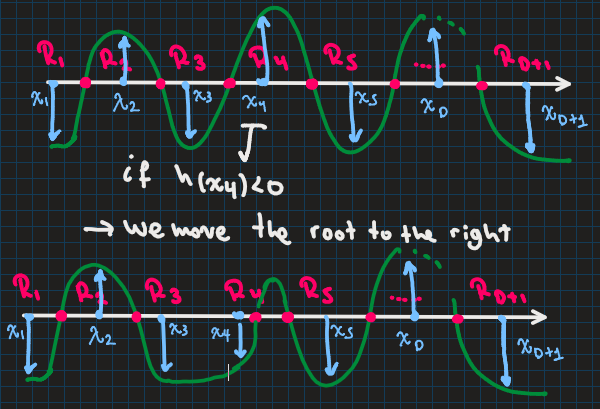

Hence we can build a polynomial such that its correspondent hypothesis matches well the $D+1$ points.

b) No matter how we build the polynomial in order to shatter $D+2$ points, by the pigeonhole principle, there exist two points (say $x_i, x_j$) that falls on the same region and indeed have the same sign, heche our hypothesis set $H$ cannot shatter $D+2$ points.

We finally conclude that the $VC$ dimension is $D+1$

# **Problem 2.20**
There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1-\delta$.

(a) Original VC-bound:

$$ \epsilon \leq \sqrt{\frac{8}{N}ln(\frac{4m_\mathcal{H}(2N)}{\delta})} $$

(b) Redemacher Penalty Bound:

$$ \epsilon \leq \sqrt{\frac{2ln(2m_\mathcal{H}(2N))}{N})} + \sqrt{\frac{2}{N}ln(\frac{1}{\delta})} +\frac{1}{N} $$

(c) Parrondo and Van den Broek:

$$  \epsilon \leq \sqrt{\frac{1}{N}\big( 2\epsilon + ln\big(\frac{6m_H(2N)}{\delta}\big)\big)} $$

d) Devroye:

$$ \epsilon \leq \sqrt{\frac{2}{N}\big(4\epsilon(1+\epsilon)+ln(\frac{4m_\mathcal{H}(N^2)}{\delta})\big)} $$

Note that (c) and (d) are implicit bounds in $\epsilon$. Fix $d_{VC} = 50$ and $\delta = 0.05$ and plot these bounds as a function of $N$. Which is best?

## Solution:

We are going to plot these bounds consider the worst case: 

$$\epsilon(N) = bound$$

And the worst one for $m_H(N)$ given by a deduced statement from the Theorem $\bf 2.4$:

$$ m_H(N) = N^{d_{vc}} + 1  $$

Secondly, from (c) and (d) we may deduce $\epsilon$ as a function of $N$ by clearing this dependent variable from those equations:



1.   Case (c): Parrondo

from

$$  \epsilon = \sqrt{\frac{1}{N}\big( 2\epsilon + ln\big(\frac{6m_H(2N)}{\delta}\big)\big)} $$

We deduce the following equivalent equalities:

\begin{align}
 &  \epsilon^2 = \frac{1}{N}\big( 2\epsilon + ln\big(\frac{6m_H(2N)}{\delta}\big)\big) \\
  \leftrightarrow & N\epsilon^2 - 2\epsilon - 2ln\big(\frac{6m_H(2N)}{\delta}\big) = 0 \\
  \leftrightarrow & \epsilon = \frac{1}{2N}[2+\sqrt{4+8N\big(2ln\big(\frac{6m_H(2N)}{\delta}\big)\big)}\big]
\end{align}

Then 

$$ \epsilon(N) = \frac{2}{N}\big(1+\sqrt{1+2N\big(2ln\big(\frac{6m_H(2N)}{\delta}\big)\big)}\big) $$

Replacing $m_H$ with its bound we get:

$$ \epsilon(N) = \frac{2}{N}\big(1+\sqrt{1+4Nln\big(\frac{6[(2N)^{d_{vc}}+1]}{\delta}\big)}\big) $$


2.   Case (d): Devroye

By an analogous way we obtain 

$$(N-8)\epsilon^2 - 8\epsilon - ln(\frac{4m_H(N^2)}{\delta}) = 0$$

Solving for $\epsilon$,

$$ \epsilon =  \frac{1}{2(N-8)}\big(8+\sqrt{64+4(N-8)ln\big(\frac{4m_H(N^2)}{\delta})}\big) $$

Hence,

$$ \epsilon =  \frac{1}{(N-8)}\big(4+\sqrt{16+(N-8)ln\big(\frac{4m_H(N^2)}{\delta})}\big) $$

Replacing $m_H(N^2)$ to $N^{d_{vc}}+1$ we obtain


$$ \epsilon(N) = \frac{1}{(N-8)}[4+\sqrt{16+(N-8)ln\big(\frac{4(N^{d_{vc}}+1)}{\delta})}] $$




In [ ]:
def mh(N,dim):
  m = pow(N,dim)+1
  return m

def vc(N,dim,delta):
  m = mh(2*N,dim)
  eps = sqrt( (8.0/float(N))*log(float(4*m)/float(delta)) )
  return eps

def penalty(N,dim,delta):
  m = mh(N,dim)
  eps = sqrt((2.0/float(N))*log( float(2.0*N*m) )) + sqrt((2.0/float(N))*log(1.0/(float(delta)))) + ( 1.0/float(N) )
  return eps

def parrondo(N, dim, delta):
  m = mh(2*N,dim)
  l = log( float(6*m) / float(delta) )
  eps = (2.0/float(N))*(1 + sqrt( 1 + 4*N*l ))
  return eps

def devroye(N,dim, delta):
  m = mh(N*N,dim)
  l = log(4*m/delta)
  eps = (1.0/float(N-8))*( 4+sqrt(float(16 + (N-8)*l)) )
  return eps


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

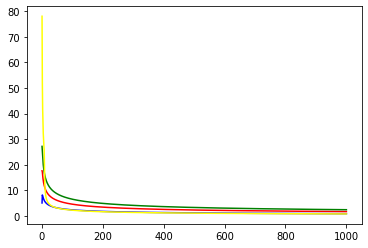

The best bound for dvc=50 and delta=0.05 is the Devroye bound


In [ ]:
dvc = 50
delta = 0.05

def plot(maxN):
  X = np.arange(1,maxN+1)
  Y_vc = [vc(N, dvc, delta) for N in X]
  Y_pen = [penalty(N, dvc, delta) for N in X]
  Y_parr = [parrondo(N, dvc, delta) for N in X]
  Y_dev = np.zeros(maxN)

  for N in X:
    if N <= 8:
      Y_dev[N-1] = 4*devroye(N+8, dvc, delta)
    else:
      Y_dev[N-1] = devroye(N, dvc, delta) 
  
  plt.plot(X,Y_vc, color = 'red')
  plt.plot(X,Y_pen, color = 'blue')
  plt.plot(X,Y_parr, color = 'green', )
  plt.plot(X,Y_dev, color = 'yellow')
  plt.show()

  best = Y_vc
  best_bound = 'Vc bound'
  if Y_pen[Nmax-1] < best[Nmax-1]:
    best = Y_pen
    best_bound = 'Penalty bound'
  if Y_parr[Nmax-1] < best[Nmax-1]:
    best = Y_parr
    best_bound = 'Parrondo bound'
  if Y_dev[Nmax-1] < best[Nmax-1]:
    best = Y_dev
    best_bound = 'Devroye bound'
  print('The best bound for dvc='+str(dvc)+' and delta='+str(delta)+' is the '+ best_bound)
Nmax = 1000
plot(Nmax)
 


